# **Dependency Structure**

In [1]:
!pip install -q stanza deplacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.9 MB/s eta 0:00:00


In [2]:
import stanza     # for NLP tasks
import deplacy    # for visualizing depdenency tree
import graphviz   # for visualizing dependency tree

In [3]:
# download id model
stanza.download('id', verbose=False)

In [4]:
# create pipeline for id texts
nlp = stanza.Pipeline('id')

# process sentence
doc = nlp("""Ini adalah kalimat biasa saja.""")

| Token	| Head	| Dep Relation	| Explanation |
| --- | --- | --- | --- |
| Ini	| adalah	| `nsubj`	| Subject of the copula "adalah" |
| adalah	| ROOT	| `root`	| Main verb (copula) |
| kalimat	| adalah | `xcomp`	| Predicative complement (noun) |
| biasa	| kalimat	| `amod`	| Adjective modifier of "kalimat" |
| saja	| biasa	| `advmod`	| Limiting adverb ("just") |
| .	| adalah	| `punct` | 	Sentence-ending punctuation |

In [5]:
# print processed sentence
print(doc)

[
  [
    {
      "id": 1,
      "text": "Ini",
      "lemma": "ini",
      "upos": "PRON",
      "xpos": "B--",
      "feats": "PronType=Dem",
      "head": 3,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 3
    },
    {
      "id": 2,
      "text": "adalah",
      "lemma": "adalah",
      "upos": "AUX",
      "xpos": "O--",
      "head": 3,
      "deprel": "cop",
      "start_char": 4,
      "end_char": 10
    },
    {
      "id": 3,
      "text": "kalimat",
      "lemma": "kalimat",
      "upos": "NOUN",
      "xpos": "NSD",
      "feats": "Number=Sing",
      "head": 0,
      "deprel": "root",
      "start_char": 11,
      "end_char": 18
    },
    {
      "id": 4,
      "text": "biasa",
      "lemma": "biasa",
      "upos": "ADJ",
      "xpos": "ASP",
      "head": 3,
      "deprel": "amod",
      "start_char": 19,
      "end_char": 24
    },
    {
      "id": 5,
      "text": "saja",
      "lemma": "saja",
      "upos": "ADV",
      "xpos": "D--",
      "head"

In [6]:
# visualize dependency tree: plain text
deplacy.render(doc)

Ini     PRON  <══════╗   nsubj
adalah  AUX   <════╗ ║   cop
kalimat NOUN  ═╗═╗═╝═╝═╗ root
biasa   ADJ   <╝ ║     ║ amod
saja    ADV   <══╝     ║ advmod
.       PUNCT <════════╝ punct


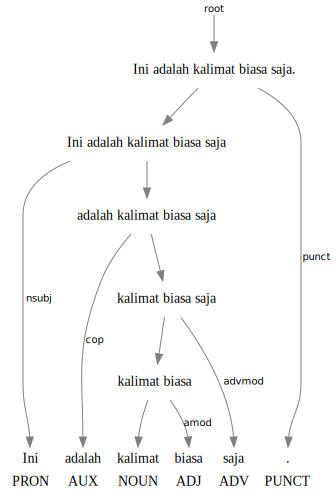

In [7]:
# visualize dependency tree: graph
graphviz.Source(deplacy.dot(doc))

In [8]:
# show dependency tree: interactive
deplacy.serve(doc, port=None)

In [9]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(f"Text: {word.text}, Lemma: {word.lemma}, POS: {word.upos}, Morph: {word.feats}")

Text: Ini, Lemma: ini, POS: PRON, Morph: PronType=Dem
Text: adalah, Lemma: adalah, POS: AUX, Morph: None
Text: kalimat, Lemma: kalimat, POS: NOUN, Morph: Number=Sing
Text: biasa, Lemma: biasa, POS: ADJ, Morph: None
Text: saja, Lemma: saja, POS: ADV, Morph: None
Text: ., Lemma: ., POS: PUNCT, Morph: None
